# PA 2.2: Love is Sparse

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.2 Due: complete this PA prior to class on Friday, Nov 22, 2024.*

This assignment will introduce you to the concept of sparse matrices in Python and how they can be useful to speed up computations and reduce file sizes. This is especially important when using the numerical schemes we are learning about (FDM, FVM, FEM) to solve problems with a lot of unknowns at each time step. To accomplish this, we will be using the `scipy.sparse` library.

Keep the `scipy.sparse` [documentation](https://docs.scipy.org/doc/scipy/reference/sparse.html) handy. Some of the work you'll do is based off this [blog](https://www.sefidian.com/2021/04/28/python-scipy-sparse-matrices-explained/), so you may find it helpful. In addition, if you don't know what a byte is, you may want to read up on [Wikipdia here](https://en.wikipedia.org/wiki/Byte) (not all of it, as long as you recognize that it is a measure of storage space on a computer).The concepts you learn here are applied to the Finite Element Method in this [book chapter](https://mude.citg.tudelft.nl/book/fem/matrix.html), which you are expected to read during Week 2.2.

**Note:** _you probably skipped over all the links in the paragraph above. While we forgive you for your haste, just remember to revisit some of them if you are struggling to finish the questions below!_


In [1]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import timeit

## Task 1: Why sparse?

Some matrices have a lot of zeros, with such an example given below. When this is the case, the way we store the actual information of the matrix (the non-zero elements) can have a big impact on computation speed and storage demands. Formats which handle this by only storing non-zero elements are called sparse, and have very different internal representations of the data to the matrices you have been familiarized with in previous programming assignments.

![Sparse matrix](images/sparse_matrix.png)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.1:</b>   

First we will create a regular Numpy matrix to use as a starting point for making a sparse one.

- Create a function (`create_dense`) which returns a square matrix of arbitrary size filled with zero and non-zero values between 0 and 1. 
- The function should take as input the size N (such that the matrix is N x N) and one float between 0 and 1, which represents the approximate fraction of the elements of the matrix which are non-zero.
- Use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html">numpy.random.rand</a> to create a random set of values between 0 and 1
- Remove a portion of the values by using simple boolean expression to set the fraction specified by <code>percentage</code> to zero.
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Note that the function below uses colons <code>:</code> with argument type, as well as a <code>-></code> before closing the function definition line. This is called "typing," which is a useful feature for helping to write code that behaves properly. In this PA you should use them like hints to help you write the functions and use them properly. If you are curious, read more <a href="https://docs.python.org/3/library/typing.html" target="_blank">here</a>.</p></div>

In [2]:
# def create_dense(size: int, percentage: float) -> np.array:
#     matrix = YOUR_CODE_HERE
#     matrix[YOUR_CODE_HERE] = 0
#     return matrix

# SOLUTION
def create_dense(size: int, percentage: float) -> np.array:
    matrix = np.random.rand(size, size)
    matrix[matrix > percentage] = 0
    return matrix

Now, set up a test to check if you set the function up correctly:

In [3]:
# test_size = YOUR_CODE_HERE
# test_percentage = YOUR_CODE_HERE
# matrix = create_dense(test_size, test_percentage)
# assert np.count_nonzero(matrix) < test_percentage*1.1*test_size**2

# SOLUTION
test_size = 1000
test_percentage = 0.1
matrix = create_dense(test_size, test_percentage)
assert np.count_nonzero(matrix) < test_percentage*1.1*test_size**2

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.2:</b>   
Use <a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.nbytes.html">array.nbytes</a> to find out how much space a 1000x1000 matrix with 10% non-zero elements takes. Try to explain where this number came from! (Hint: the answer is in the assert statement)
</p>
</div>

In [4]:
# my_matrix_size = YOUR_CODE_HERE
# assert my_matrix_size == 8*test_size**2

# SOLUTION
my_matrix_size = matrix.nbytes
assert my_matrix_size == 8*test_size**2

Next we will explore how to use `scipy.sparse`, and how this reduces the data size of the matrix. The [ documentation](https://docs.scipy.org/doc/scipy/reference/sparse.html) gives us many different types of formats to choose from, so we'll explore two of them: BSR (Block Sparse Row) and CSR (Compressed Sparse Row). 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.3:</b>   
    Complete the code below to make a CSR and BSR matrix from the <code>matrix</code> variable.
</p>
</div>

In [5]:
# csr_matrix = YOUR_CODE_HERE
# bsr_matrix = YOUR_CODE_HERE

# SOLUTION
csr_matrix = sparse.csr_array(matrix)
bsr_matrix = sparse.bsr_array(matrix)

Let's compare the new storage requirements and see how much of an improvement we got (it should approach the value used above for `test_percentage`, but not reach it exactly):

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.4:</b>   
    Run the code below and comment on the improvement and whether or not it reaches the target percentage of sparse values in the non-sparse matrix.
</p>
</div>

In [24]:
print(f"CSR matrix size: {csr_matrix.data.size} bytes")
print(f"Compared to the normal matrix, CSR uses this "
      +f"fraction of space: {csr_matrix.data.nbytes/my_matrix_size:0.6f}")
print(f"BSR matrix size: {bsr_matrix.data.size} bytes")
print(f"Compared to the normal matrix, BSR uses this "
      +f"fraction of space: {bsr_matrix.data.nbytes/my_matrix_size:0.6f}")

CSR matrix size: 2000 bytes
Compared to the normal matrix, CSR uses this fraction of space: 0.002000
BSR matrix size: 2000 bytes
Compared to the normal matrix, BSR uses this fraction of space: 0.002000


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

As we can see in the output, the sparse methods reduce the size of the matrix by about 10x than the non-sparse method. This is nearly identical to the target percentage!
</p>
</div>

## Task 2: [What is love?](https://www.youtube.com/watch?v=HEXWRTEbj1I)

Let's look into a small example of how sparse matrices can also help improve calculation speeds. We'll study the mysterious case of a massive friend group with a concerning love circle and how we can predict how each person feels with respect to the other. This is quantified by the amount of love, $n_i$, that is "felt" by person $i$. In fact, the feelings grow stronger with time, which means they can be described with a simple differential relationship between _neighbors_, where each person in the group is happy when the other is sad, but the opposite is true for the other person, which can be defined like this: 

$$
\begin{pmatrix}
\cfrac{dn_1}{dt}\\
\cfrac{dn_2}{dt} \\
\end{pmatrix} 
=
\begin{pmatrix}
0 & 1\\
-1 & 0 \\
\end{pmatrix} 
\begin{pmatrix}
n_1\\
n_2 \\
\end{pmatrix} 
$$

So in this case, person 2 doesn't like it when person 1 is happy but person 2 likes it when person 1 is happy. If we extend this to a four case scenario we'd get the following matrix:
$$
\begin{pmatrix}
\cfrac{dn_1}{dt}\\
\cfrac{dn_2}{dt}\\
\cfrac{dn_3}{dt}\\
\cfrac{dn_4}{dt}\\
\end{pmatrix} 
=
\begin{pmatrix}
0  & 1  & 0 & -1 \\
-1 & 0  & 1 & 0  \\
0  & -1 & 0 & 1  \\
1  & 0  & -1 & 0  \\
\end{pmatrix} 
\begin{pmatrix}
n_1 \\
n_2 \\
n_3 \\
n_4 \\
\end{pmatrix} 
$$

Now we can see how everyone's feelings towards each other are...complicated!

What happens if we extend it to even more people? The pattern persists, but importantly: _if the group gets very large, we will be storing a lot of useless information, all the 0's between the 1's!_

OK, so maybe this is a silly example, but it creates a problem that is actually very similar to how we use individual elements to construct a global system of equations to solve in the Finite Element Method!

We can easily operationalize the procedure of _constructing_ this matrix using the method `ix_`, for which a simple example is provided in the code cell below (this example is generic to illustrate `ix_` usage and is not related to the love circle!):

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.0:</b>   
 
Read and modify the code cell below until you are confident you understand how the <code>ix_</code> method works.

</p>
</div>

In [ ]:
blank = np.zeros(shape=(4, 4))
blueprint = np.array([[0, 0.5], 
                      [1, 0.5]])

for i in range(2):
    # First argument will be used for rows
    # Second for columns
    blank[np.ix_([i*2, i*2 + 1], [1, 2])] = blueprint
    
print(blank)

[[0.  0.  0.5 0. ]
 [0.  1.  0.5 0. ]
 [0.  0.  0.5 0. ]
 [0.  1.  0.5 0. ]]


Now we return to the love triangle problem and try to construct the matrix for a large group using `ix_`.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.1:</b>   
Generate the matrix <code>relationship</code> for the differential equation for 1000 people. Use the <a href="https://numpy.org/doc/stable/reference/generated/numpy.ix_.html"><code>numpy.ix_</code></a> function to make your life easier.

Note that we have already provided an easy way to place the smaller sub-matrices in the right place.
</p>
</div>

In [ ]:
# N = 1000
# relationship = np.zeros(shape=(N, N))

# YOUR_CODE_HERE

# for i in range(N):
#     relationship[np.ix_([i, (i+1)%N], [i, (i+1)%N])] = YOUR_CODE_HERE

# SOLUTION
N = 1000
relationship = np.zeros(shape=(N, N))

general = np.array([[0, 1], [-1, 0]])

for i in range(N):
    relationship[np.ix_([i, (i+1)%N], [i, (i+1)%N])] = general

Remember `plt.matshow()`? We used this back in Q1 to visualize the contents of a matrix. Try it now to see if we build this matrix correctly with `ix_`.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.2:</b>   
    Use <code>plt.matshow()</code> to view the contents of the matrix <code>relationship</code>.
</p>
</div>

In [ ]:
# plt.matshow(YOUR_CODE_HERE)

# SOLUTION
plt.matshow(relationship)

 Note that since the matrix is huge, we have to look at only a small subset of it in order to see its contents; try changing the indices of the plotted values to get a better view.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.3:</b>   
    Try again, but look at a subset of the matrix!
</p>
</div>

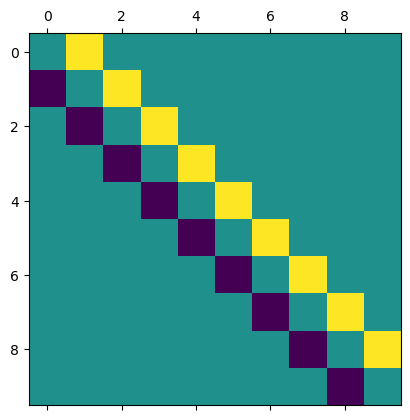

In [ ]:
# plt.matshow(YOUR_CODE_HERE)

# SOLUTION
plt.matshow(relationship[0:10,0:10])

Finally, we are going to use the forward Euler method to simulate this differential equation for a total of 5 seconds over 1000 iterations. This has already been implemented in the `test` method.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.4:</b>   
Find the time it takes to evaluate the relationship using <code>timeit</code> by entering the function you wish to evaluate as a string.

HINT: you have already learned how to convert a matrix into a sparse format, and the function is defined for you. Run the code cell and compare the performances of the different matrix formats. Which one is faster? How much space do they take?
</p>
</div>

In [ ]:
# N_ITS = 1000
# T = 5 # Seconds
# dt = T/N_ITS

# def test(rel_matrix):
#     state = np.zeros(N)
#     state[0] = 1
#     for i in range(N_ITS):
#         state = state + rel_matrix @ state * dt

# csr_matrix = YOUR_CODE_HERE
# bsr_matrix = YOUR_CODE_HERE
# print(f"Standard: {timeit.timeit('test(relationship)',
#                                  globals=globals(),
#                                  number=10)/10:.4f}")
# print(f"CSR: {timeit.timeit('test(csr_matrix)',
#                             globals=globals(),
#                             number=10)/10:.4f}")
# print(f"BSR: {timeit.timeit('test(bsr_matrix)',
#                             globals=globals(),
#                             number=10)/10:.4f}")
    

# SOLUTION
N_ITS = 1000
T = 5 # Seconds
dt = T/N_ITS

def test(rel_matrix):
    state = np.zeros(N)
    state[0] = 1
    for i in range(N_ITS):
        state = state + rel_matrix @ state * dt

csr_matrix = sparse.csr_array(relationship)
bsr_matrix = sparse.bsr_array(relationship)
print(f"Standard: {timeit.timeit('test(relationship)',
                                 globals=globals(),
                                 number=10)/10:.4f}")
print(f"CSR: {timeit.timeit('test(csr_matrix)',
                            globals=globals(),
                            number=10)/10:.4f}")
print(f"BSR: {timeit.timeit('test(bsr_matrix)',
                            globals=globals(),
                            number=10)/10:.4f}")

Standard: 0.0853
CSR: 0.0096
BSR: 0.0110


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.5:</b>   

What is the change in performance by using the sparse matrices?

</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

As we can see in the output, the sparse methods perform similarly, each around 10x faster than the non-sparse method.
</p>
</div>

One final consideration when using sparse matrices is that it can take a long time to generate them from a regular matrix. You can test this out by placing the matrix generation inside or outside the <code>timeit</code> code to compare their performances. Try it!

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->